In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import requests

sanFranData= pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
seattleData= pd.read_csv('seattle_incidents_summer_2014.csv')

c:\users\ramy.zulficar\appdata\local\enthought\canopy\user\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


The above code loads the data. In this assignment I will only be looking at the San Francisco dataset, as I did not have enough time to explore both datasets, but I hope to explore the other soon. 

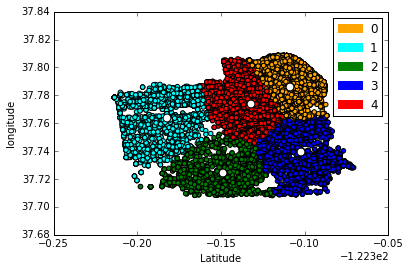

In [3]:
import matplotlib.patches as mpatches

clusterAlgo= KMeans(n_clusters=5)
x= clusterAlgo.fit_predict(zip(sanFranData.X.values, sanFranData.Y.values))
clusterCenters= clusterAlgo.cluster_centers_
sanFranData['locationCategory']= pd.Series(x)


sanFranData['Month']=[str(i).split('/')[0] for i in sanFranData['Date']]
xCenters= clusterCenters[:,:1]
yCenters= clusterCenters[:,1:]
#print categoryCount.DayOfWeek.value_counts().unstack().fillna(0)
categoryCount=sanFranData.groupby(['locationCategory','Category']).size().order()
counts=  categoryCount.unstack().T
#for i in counts.columns:
#    print counts[i]
#categoryCount[categoryCount['locationCategory']==1].DayOfWeek.value_counts().plot(kind='bar',stacked=True)


legendNames=range(5)
colorList=['orange','cyan','green','blue','red']
colors=[mpatches.Patch(color=colorList[g], label="Loca "+str(g)) for g in legendNames]
plt.scatter(sanFranData.X.values, sanFranData.Y.values, c=[colorList[i] for i in x])
plt.scatter(xCenters, yCenters, c='white',s=60)
plt.xlabel('Latitude')
plt.ylabel('longitude')
plt.legend(colors, range(5))



I started off by trying to split my dataset geographically into regions. I chose 5 regions to split on arbitrarily, but I could have performed more exploratory analysis to see how many regions would be an optimal split in this instance. To perform the split, I used a K-Means clustering algorithm that acted on the <LAT,LONG> values of the data. Using K-Means on these two attributes lent itself very well to splitting the graph into geographic regions, as can be seen from the image above.

Further, I have also added the centers of each regions (shown as white dots) in order to give a better idea of where the center of each region is. I tried to perform reverse geo-coding to provide a location for the 5 centers, but found that it was slowing my code down significantly. 

locationCategory
0     4865
1     2317
2    13031
3     2201
4     6579
dtype: float64


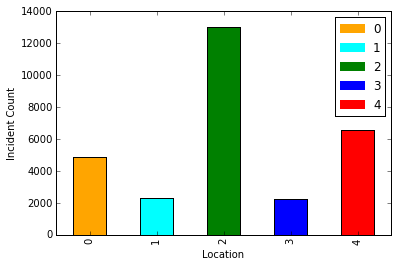

In [73]:
counts=  categoryCount.unstack().T
print counts.sum()
g=pd.DataFrame(counts.sum())
g['color']=colorList

g.plot(kind='bar',color=[g.color])
plt.legend(colors, range(5))
plt.xlabel("Location")
plt.ylabel("Incident Count")

Here I have split the incident count into the regions seen above in order to discern if any region has a particularly high crime rate. It can be seen clearly here that region 2 has a higher crime rate than all other regions. Further, you can see that the regions 4 and 0 also have high crime rates, and they geographically border region 2. It appears from the visualization that regions that are towards the East/North have higher crime rates

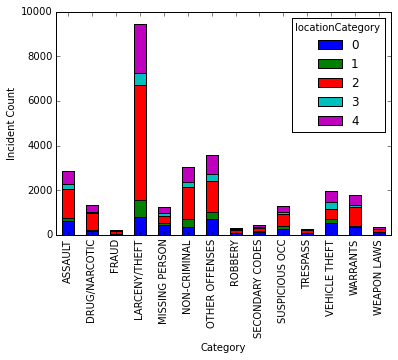

In [74]:
categoryCount.unstack().T[categoryCount.unstack().sum()>150].plot(kind='bar', stacked=True)
#categoryCount.unstack()[categoryCount.unstack().sum()>100].plot(kind='bar',stacked=True)
#print categoryCount.unstack().sum().order()[categoryCount.unstack().sum()>100]#.plot(kind='bar',stacked=True)
plt.ylabel("Incident Count")

Here I have broken down crime incident rates by their categories, as well as providing a break-down of the incident rates for each region. This graph looked to be normal, as it was expected that regions with higher incident rates overall would have higher incident rates for individual crime categories. However, it is worth noting that region 2 does not have a large share of incident rates for the "Vehicle Theft" category.

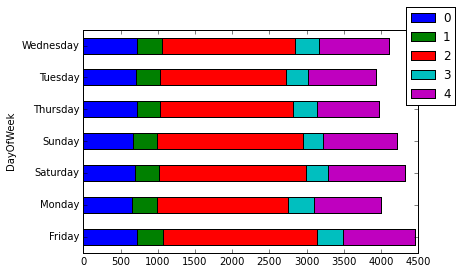

In [71]:
dayCount=sanFranData.groupby(['locationCategory','DayOfWeek']).size().order()
counts=  dayCount.unstack().T
dayCount.unstack().T.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel('Incident Count')

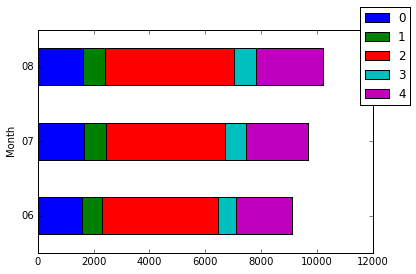

In [67]:
monthCount=sanFranData.groupby(['locationCategory','Month']).size().order()
#counts=monthCount.unstack().T
monthCount.unstack().T.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel('Incident Count')

Finally, I also broke down the crime rates based off month, and it is clear to see that crime rates rose as we got further into the summer.